In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from IPython.display import Image  
from sklearn import tree
import pydotplus
import itertools

# Модели с абсолютными величинами

In [200]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [201]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple1000_1.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [202]:
df[['name', 'grade1', 'grade2', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df['h'].str.split('\t',expand=True)

In [203]:
df.head()

,h,name,grade1,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,...,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,nan
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1....,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,55,aver,186,2,3,2,7,13,...,34,6,12,2,0,12,4,6,67,
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1....,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,50,aver,195,4,2,1,10,14,...,36,1,3,1,0,17,3,8,60,
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1....,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,75,best,271,5,1,3,11,23,...,33,3,6,3,1,19,2,8,66,
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1....,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,55,aver,218,3,0,1,10,14,...,46,3,2,0,0,12,3,11,78,
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1....,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,60,aver,190,2,0,3,9,13,...,39,4,2,1,2,15,3,6,64,


In [204]:
df = df.drop(['h','nan', 'grade1'], axis=1)

In [205]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,186,2,3,2,7,13,13,0,...,13,34,6,12,2,0,12,4,6,67
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,195,4,2,1,10,14,14,0,...,19,36,1,3,1,0,17,3,8,60
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,271,5,1,3,11,23,23,0,...,21,33,3,6,3,1,19,2,8,66
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,218,3,0,1,10,14,14,0,...,27,46,3,2,0,0,12,3,11,78
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,190,2,0,3,9,13,13,0,...,18,39,4,2,1,2,15,3,6,64


In [206]:
len(df[df.grade2 == 'aver'])

928

In [207]:
len(df[df.grade2 == 'best'])

76

In [208]:
len(df[df.grade2 == 'worst'])

52

In [209]:
df.shape

(1056, 21)

In [210]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade2'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [211]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,186,2,3,2,7,13,13,0,...,6,12,2,0,12,4,6,67,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,195,4,2,1,10,14,14,0,...,1,3,1,0,17,3,8,60,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,271,5,1,3,11,23,23,0,...,3,6,3,1,19,2,8,66,nonworst,best
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,218,3,0,1,10,14,14,0,...,3,2,0,0,12,3,11,78,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,190,2,0,3,9,13,13,0,...,4,2,1,2,15,3,6,64,nonworst,nonbest


In [212]:
df_best_non = df.drop(['grade2', 'name', 'mark_worst_nonworst'], axis=1)

In [213]:
df_best_non.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest
0,186,2,3,2,7,13,13,0,1,13,34,6,12,2,0,12,4,6,67,nonbest
1,195,4,2,1,10,14,14,0,5,19,36,1,3,1,0,17,3,8,60,nonbest
2,271,5,1,3,11,23,23,0,8,21,33,3,6,3,1,19,2,8,66,best
3,218,3,0,1,10,14,14,0,4,27,46,3,2,0,0,12,3,11,78,nonbest
4,190,2,0,3,9,13,13,0,2,18,39,4,2,1,2,15,3,6,64,nonbest


In [214]:
df_best_non.shape

(1056, 20)

In [215]:
y = df_best_non.values[:, df_best_non.shape[1]-1]

In [216]:
y

array(['nonbest', 'nonbest', 'best', ..., 'best', 'best', 'nonbest'],
      dtype=object)

In [217]:
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

# Корреляция признаков

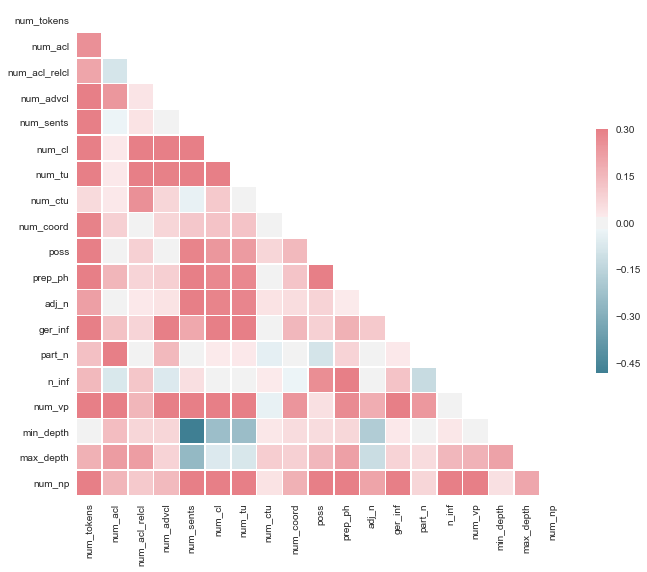

In [218]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

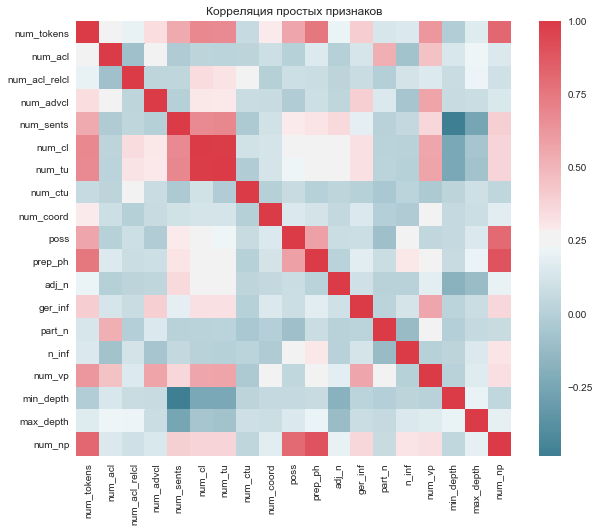

In [219]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция простых признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_simple.png')

# Разделение на тестовую и тренировочную выборку

In [220]:
from sklearn.model_selection import StratifiedKFold

**Примерно:**

Всего: 95 эссе (38 (40%) best; 57 (60%) nonbest)

Тестовая выборка (20%): 19(8 (40%) best; 11 (60%) nonbest)

Тренировочная выборка (80%): 76(30 (40%) best; 46 (60%) nonbest)

In [221]:
skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 950 essays ): [ 106  107  108  109  110  111  112  113  114  115  116  117  118  119
  120  121  122  123  124  125  126  127  128  129  130  131  132  133
  134  135  136  137  138  139  140  141  142  143  144  145  146  147
  148  149  150  151  152  153  154  155  156  157  158  159  160  161
  162  163  164  165  166  167  168  169  170  171  172  173  174  175
  176  177  178  179  180  181  182  183  184  185  186  187  188  189
  190  191  192  193  194  195  196  197  198  199  200  201  202  203
  204  205  206  207  208  209  210  211  212  213  214  215  216  217
  218  219  220  221  222  223  224  225  226  227  228  229  230  231
  232  233  234  235  236  237  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298

# Дерево решений

In [222]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [223]:
y_pred = clf1.predict(X_test)

In [224]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.08      0.14      0.11         7
    nonbest       0.94      0.89      0.91        98

avg / total       0.88      0.84      0.86       105



In [225]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

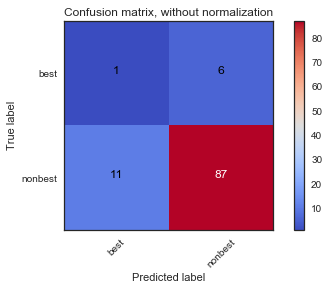

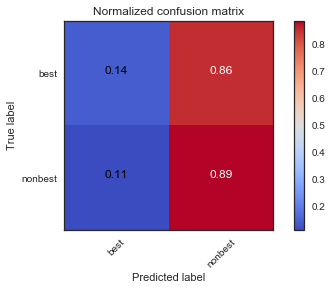

In [226]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [227]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.84


# Дерево решений с выбором лучших гиперпараметров

In [228]:
X_df_best_non.shape[1]

19

In [229]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [230]:
y_pred = clf1.predict(X_test)

In [231]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.00      0.00      0.00         7
    nonbest       0.93      0.95      0.94        98

avg / total       0.87      0.89      0.88       105



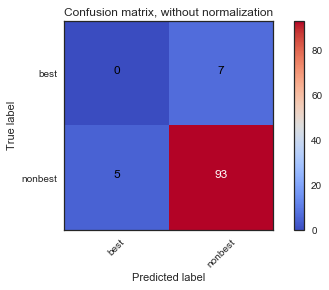

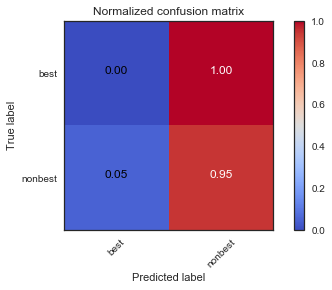

In [232]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [233]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.89


In [234]:
import collections

Feature ranking:
    importance   name_feature
0     0.226606     num_tokens
1     0.088192        num_acl
15    0.076948         num_vp
17    0.070689      max_depth
9     0.066809           poss
18    0.063752         num_np
10    0.059628        prep_ph
13    0.057137         part_n
3     0.052923      num_advcl
12    0.044215        ger_inf
4     0.040970      num_sents
5     0.040598         num_cl
11    0.034176          adj_n
16    0.025054      min_depth
14    0.021426          n_inf
7     0.014180        num_ctu
6     0.006522         num_tu
8     0.006050      num_coord
2     0.004126  num_acl_relcl


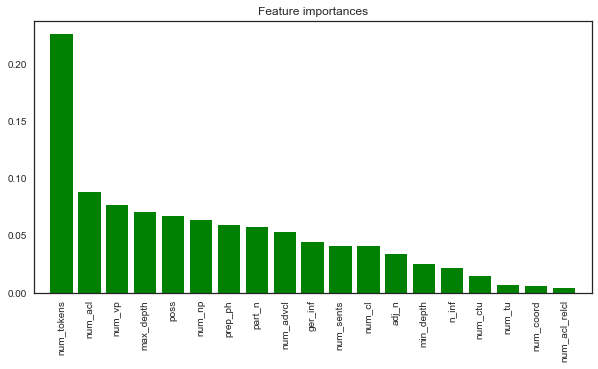

In [235]:
imp(clf1, X_df_best_non.columns)

In [236]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=29, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [237]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('/Users/irene/Desktop/Курсовая/graphs/decision_tree1000_1.png')

True

# RandomForestClassifier

In [40]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
y_pred = clf2.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.00      0.00      0.00         7
    nonbest       0.93      0.99      0.96        98

avg / total       0.87      0.92      0.90       105



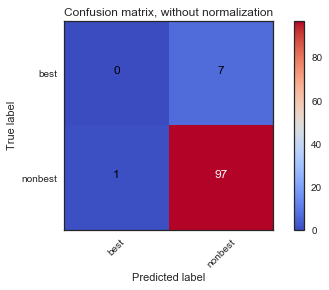

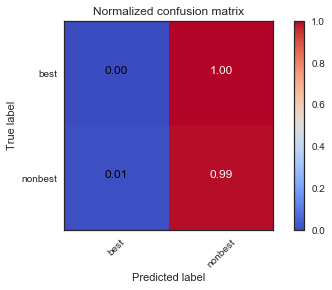

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [44]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.92


# RandomForestClassifier с выбором лучших гиперпараметров

In [45]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

In [46]:
y_test_1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0]

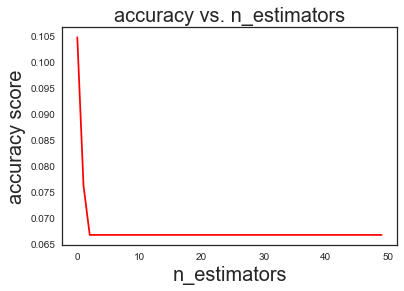

In [47]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [48]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=15, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [49]:
clf2.best_params_

{'max_depth': 20, 'max_features': 18}

In [50]:
y_pred = clf2.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.00      0.00      0.00         7
    nonbest       0.93      1.00      0.97        98

avg / total       0.87      0.93      0.90       105



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


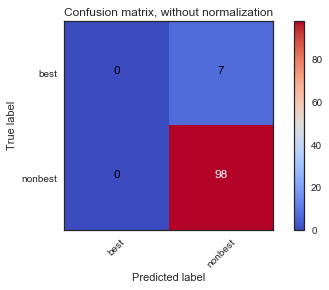

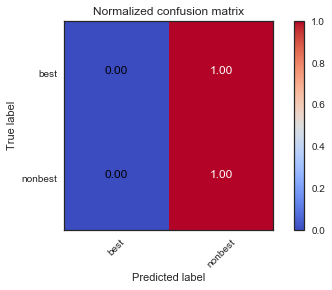

In [52]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [53]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.93


Feature ranking:
    importance   name_feature
0     0.228278     num_tokens
1     0.081262        num_acl
9     0.072918           poss
18    0.066451         num_np
10    0.063294        prep_ph
3     0.061334      num_advcl
15    0.054161         num_vp
11    0.047842          adj_n
12    0.047402        ger_inf
4     0.045824      num_sents
17    0.038488      max_depth
14    0.034324          n_inf
2     0.032784  num_acl_relcl
8     0.030613      num_coord
6     0.025835         num_tu
13    0.022328         part_n
5     0.021194         num_cl
16    0.019546      min_depth
7     0.006124        num_ctu


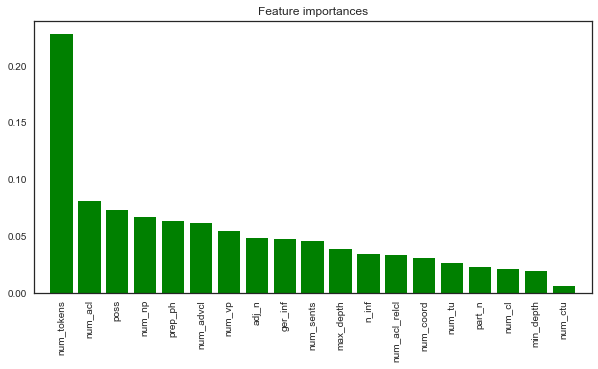

In [54]:
imp(clf2, X_df_best_non.columns)

# LogisticRegression c важными признаками ('l1')

In [55]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_pred = clf3.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.00      0.00      0.00         7
    nonbest       0.93      0.99      0.96        98

avg / total       0.87      0.92      0.90       105



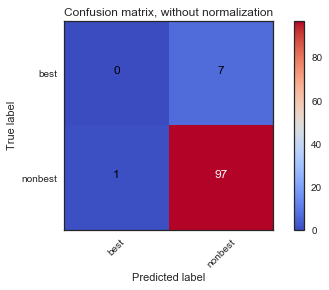

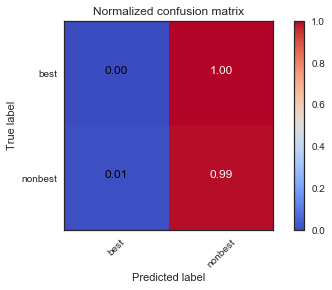

In [58]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [59]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.92


# LogisticRegression с лучшими гиперпараметрами

In [60]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
clf3.best_params_

{'C': 1.0}

In [62]:
y_pred = clf3.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.00      0.00      0.00         7
    nonbest       0.93      0.99      0.96        98

avg / total       0.87      0.92      0.90       105



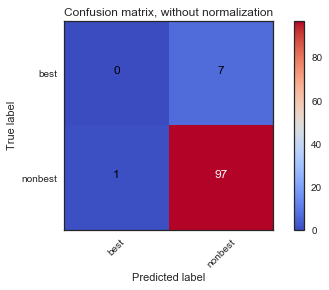

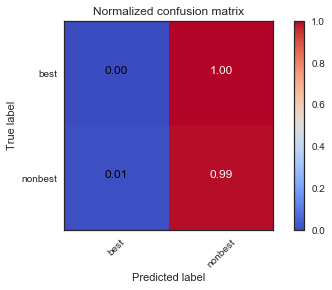

In [64]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [65]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.92


In [66]:
def imp2(clf_grid, feature_names):
    importances = 100.0 * (abs(clf_grid.coef_[0]) / abs(clf_grid.coef_[0]).max())
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Relative feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [67]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Feature ranking:
    importance   name_feature
7   100.000000        num_ctu
3    77.470571      num_advcl
14   61.140500          n_inf
13   53.123568         part_n
1    39.579940        num_acl
15   19.443065         num_vp
11   17.735031          adj_n
16   12.957532      min_depth
12   11.230943        ger_inf
9     8.609677           poss
0     7.677104     num_tokens
10    7.334022        prep_ph
5     7.192651         num_cl
17    5.978002      max_depth
18    5.066384         num_np
8     3.752546      num_coord
2     3.566757  num_acl_relcl
4     0.255027      num_sents
6     0.000000         num_tu


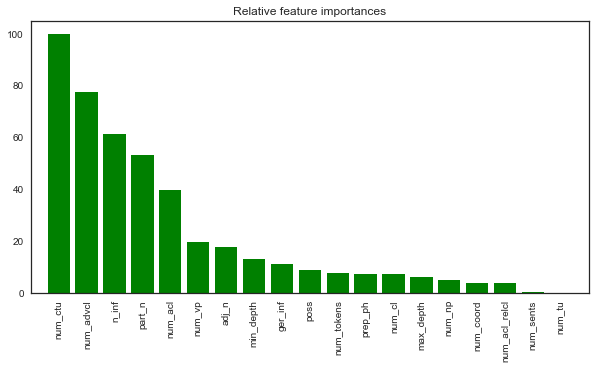

In [68]:
imp2(clf3, X_df_best_non.columns)

# Разделение на три класса

In [69]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,186,2,3,2,7,13,13,0,...,6,12,2,0,12,4,6,67,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,195,4,2,1,10,14,14,0,...,1,3,1,0,17,3,8,60,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,271,5,1,3,11,23,23,0,...,3,6,3,1,19,2,8,66,nonworst,best
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,218,3,0,1,10,14,14,0,...,3,2,0,0,12,3,11,78,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,190,2,0,3,9,13,13,0,...,4,2,1,2,15,3,6,64,nonworst,nonbest


In [70]:
df_three = df.drop(['name', 'mark_best_nonbest', 'mark_worst_nonworst'], axis=1)

In [71]:
df_three.head()

,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,aver,186,2,3,2,7,13,13,0,1,13,34,6,12,2,0,12,4,6,67
1,aver,195,4,2,1,10,14,14,0,5,19,36,1,3,1,0,17,3,8,60
2,best,271,5,1,3,11,23,23,0,8,21,33,3,6,3,1,19,2,8,66
3,aver,218,3,0,1,10,14,14,0,4,27,46,3,2,0,0,12,3,11,78
4,aver,190,2,0,3,9,13,13,0,2,18,39,4,2,1,2,15,3,6,64


In [72]:
y = df_three.values[:, 0]

In [73]:
y

array(['aver', 'aver', 'best', ..., 'best', 'best', 'aver'], dtype=object)

In [74]:
X_three = df_three.drop(['grade2'], axis=1)
X_three[X_three.columns] = X_three[X_three.columns].astype(float)
X = X_three.values[:, 0:X_three.shape[1]]

In [75]:
skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

10

In [76]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 949 essays ): [ 103  104  105  106  107  108  110  111  112  113  114  115  116  117
  118  119  120  121  122  123  124  125  126  127  128  129  130  131
  132  133  134  136  137  138  139  140  141  142  143  144  145  146
  147  148  149  150  151  152  153  154  155  157  158  159  160  161
  162  163  164  165  166  167  168  169  170  171  172  173  174  175
  176  177  178  179  180  181  182  183  184  185  186  187  188  189
  190  191  192  193  194  195  196  197  198  199  200  201  202  203
  204  205  206  207  208  209  210  211  212  213  214  215  216  217
  218  219  220  221  222  223  224  225  226  227  228  229  230  231
  232  233  234  235  236  237  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  297  298  299

# LogisticRegression c важными признаками ('l1')

In [77]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
y_pred = clf3.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.90      1.00      0.95        92
       best       0.00      0.00      0.00         7
      worst       1.00      0.40      0.57         5

avg / total       0.85      0.90      0.87       104



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


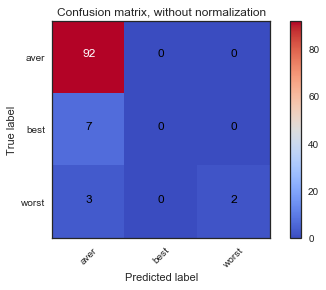

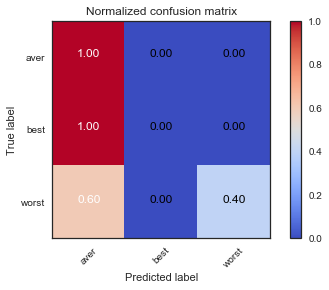

In [80]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [81]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.9


# LogisticRegression с лучшими гиперпараметрами

In [82]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
y_pred = clf3.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.90      1.00      0.95        92
       best       0.00      0.00      0.00         7
      worst       1.00      0.40      0.57         5

avg / total       0.85      0.90      0.87       104



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


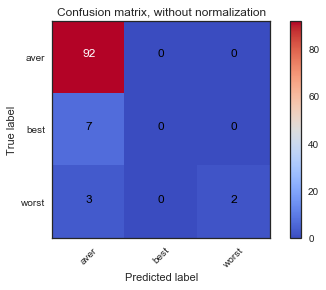

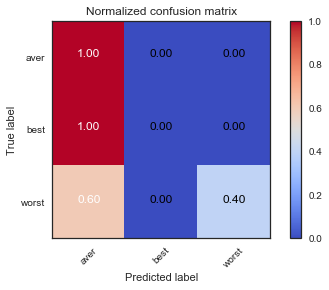

In [85]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [86]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.9


In [87]:
clf3.best_params_

{'C': 1.0}

In [88]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Feature ranking:
    importance   name_feature
14  100.000000          n_inf
13   86.242626         part_n
7    67.604716        num_ctu
3    66.391046      num_advcl
1    51.421867        num_acl
17   50.438813      max_depth
4    28.275140      num_sents
15   22.188911         num_vp
10   14.160433        prep_ph
6    10.294098         num_tu
12    8.605970        ger_inf
9     5.435865           poss
0     5.364423     num_tokens
11    5.032128          adj_n
8     4.562368      num_coord
16    2.408918      min_depth
5     0.000000         num_cl
2     0.000000  num_acl_relcl
18    0.000000         num_np


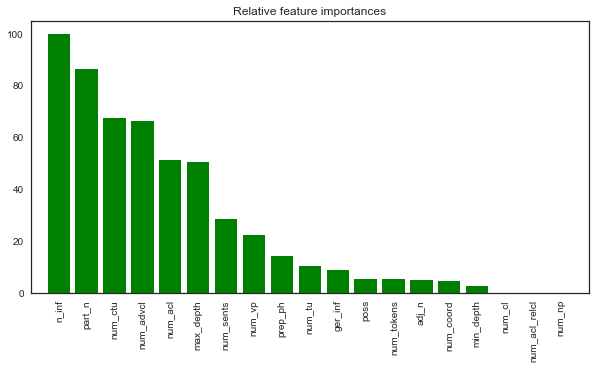

In [89]:
imp2(clf3, X_three.columns)

# Дерево решений

In [90]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
y_pred = clf1.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.91      0.84      0.87        92
       best       0.08      0.14      0.10         7
      worst       0.33      0.40      0.36         5

avg / total       0.82      0.77      0.79       104



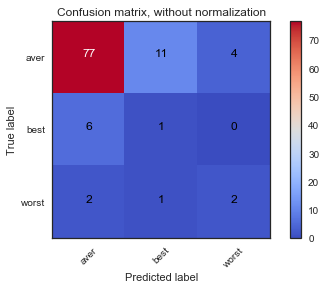

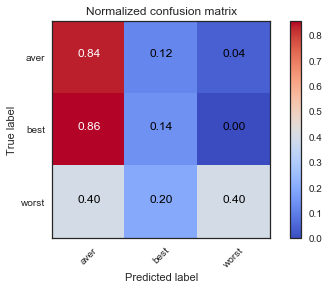

In [93]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [94]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.77


# Дерево решений с выбором лучших гиперпараметров

In [95]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [96]:
y_pred = clf1.predict(X_test)

In [97]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.89      0.92      0.91        92
       best       0.00      0.00      0.00         7
      worst       0.33      0.40      0.36         5

avg / total       0.81      0.84      0.82       104



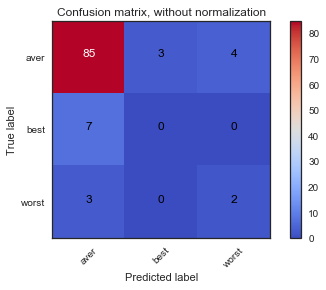

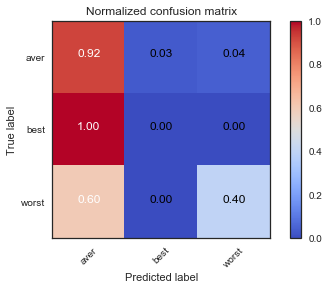

In [98]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [99]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.84


Feature ranking:
    importance   name_feature
0     0.279125     num_tokens
10    0.079430        prep_ph
5     0.078121         num_cl
1     0.065114        num_acl
4     0.060173      num_sents
15    0.057753         num_vp
9     0.053164           poss
11    0.046434          adj_n
17    0.041568      max_depth
6     0.039722         num_tu
3     0.034304      num_advcl
12    0.032065        ger_inf
2     0.028977  num_acl_relcl
18    0.025377         num_np
8     0.023249      num_coord
14    0.021656          n_inf
16    0.017706      min_depth
13    0.012216         part_n
7     0.003846        num_ctu


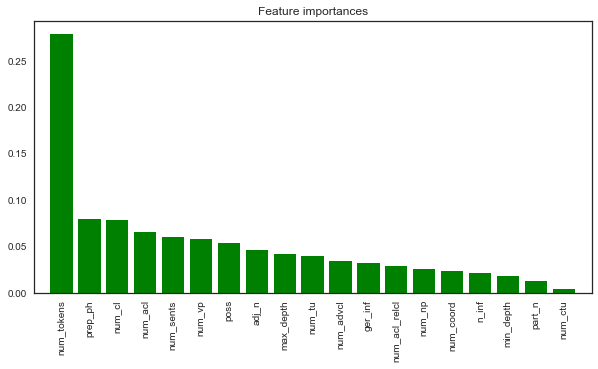

In [100]:
imp(clf1, X_three.columns)

In [101]:
clf1.best_params_

{'max_depth': 27, 'max_features': 13}

In [102]:
clf1 = DecisionTreeClassifier(max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=27,
            max_features=13, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# RandomForestClassifier

In [104]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
y_pred = clf2.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.90      0.98      0.94        92
       best       0.00      0.00      0.00         7
      worst       0.50      0.40      0.44         5

avg / total       0.82      0.88      0.85       104



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


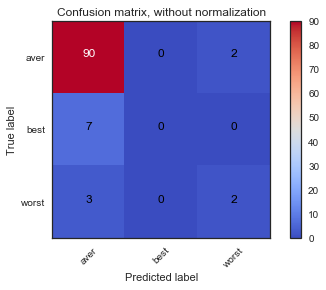

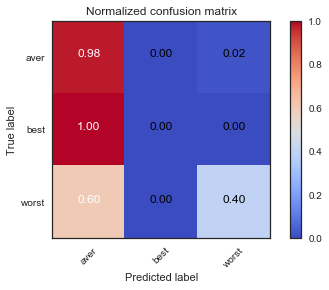

In [107]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [108]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.88


# RandomForestClassifier с выбором лучших гиперпараметров

In [109]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    elif x == 'worst':
        y_test_1.append(0)
    else:
        y_test_1.append(2)

In [110]:
y_test_1

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2]

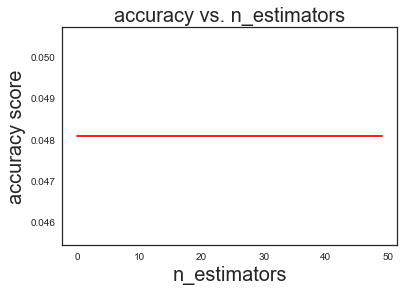

In [111]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [112]:
parameters = {
    'max_features': range(1, X_three.shape[1]),
    'max_depth' : range(1, 30),
}
clf_rfc = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf_rfc, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [113]:
y_pred = clf2.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.90      0.99      0.94        92
       best       0.00      0.00      0.00         7
      worst       0.67      0.40      0.50         5

avg / total       0.83      0.89      0.86       104



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


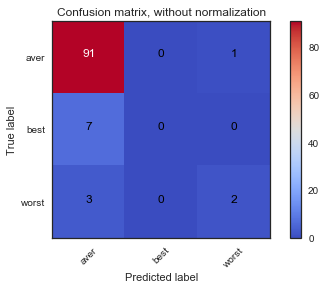

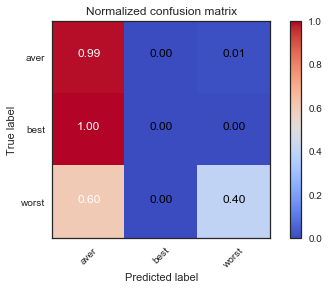

In [115]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [116]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.89


Feature ranking:
    importance   name_feature
0     0.129547     num_tokens
10    0.118039        prep_ph
18    0.103664         num_np
15    0.069022         num_vp
3     0.061487      num_advcl
9     0.060924           poss
6     0.054867         num_tu
4     0.049118      num_sents
12    0.045508        ger_inf
1     0.044557        num_acl
5     0.044355         num_cl
17    0.039589      max_depth
8     0.035412      num_coord
14    0.031933          n_inf
2     0.030681  num_acl_relcl
13    0.026473         part_n
11    0.025682          adj_n
16    0.019985      min_depth
7     0.009157        num_ctu


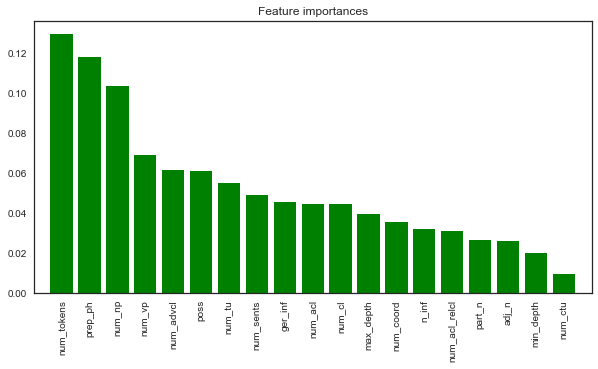

In [117]:
imp(clf2, X_three.columns)

# Worst vs nonworst

In [118]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,186,2,3,2,7,13,13,0,...,6,12,2,0,12,4,6,67,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,195,4,2,1,10,14,14,0,...,1,3,1,0,17,3,8,60,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,271,5,1,3,11,23,23,0,...,3,6,3,1,19,2,8,66,nonworst,best
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,218,3,0,1,10,14,14,0,...,3,2,0,0,12,3,11,78,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,190,2,0,3,9,13,13,0,...,4,2,1,2,15,3,6,64,nonworst,nonbest


In [119]:
df_worst_non = df.drop(['grade2', 'name', 'mark_best_nonbest'], axis=1)

In [120]:
y = df_worst_non.values[:, df_worst_non.shape[1]-1]

In [121]:
y

array(['nonworst', 'nonworst', 'nonworst', ..., 'nonworst', 'nonworst',
       'nonworst'], dtype=object)

In [122]:
X_worst = df_worst_non.drop(['mark_worst_nonworst'], axis=1)
X_worst[X_worst.columns] = X_worst[X_worst.columns].astype(float)
X = X_worst.values[:, 0:X_worst.shape[1]]

In [123]:
skf = StratifiedKFold(n_splits=2, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

2

In [124]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 528 essays ): [ 516  517  518  519  520  521  522  523  524  525  526  527  528  529
  530  531  532  533  534  535  536  537  538  539  540  541  542  543
  545  546  547  548  549  550  551  552  553  554  555  556  557  558
  559  560  561  562  563  564  565  566  567  568  569  570  571  572
  573  574  575  576  577  578  579  580  581  582  583  584  585  586
  587  588  589  590  591  592  593  594  595  596  597  598  599  600
  601  602  603  604  605  606  607  608  609  610  611  612  613  614
  615  616  617  618  619  620  621  622  623  624  625  626  627  628
  629  630  631  632  634  635  636  637  638  639  640  641  642  643
  644  645  646  647  648  649  650  651  652  653  654  655  656  657
  658  659  660  661  662  663  664  665  666  667  668  669  670  671
  673  674  675  676  677  678  679  680  681  682  683  684  685  686
  687  688  689  690  691  692  693  694  695  696  697  698  699  700
  701  702  703  704  705  706  707  708  709  710  711

# Дерево решений

In [125]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

             precision    recall  f1-score   support

   nonworst       0.97      0.96      0.96       502
      worst       0.36      0.46      0.41        26

avg / total       0.94      0.93      0.94       528



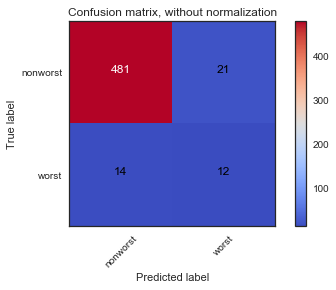

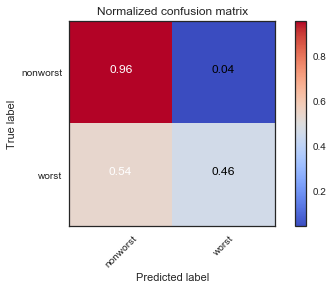

Accuracy:  0.93


In [126]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# Дерево решений с подбором лучших гиперпараметров

In [127]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.96      0.96      0.96       502
      worst       0.28      0.27      0.27        26

avg / total       0.93      0.93      0.93       528



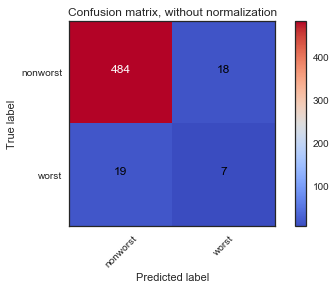

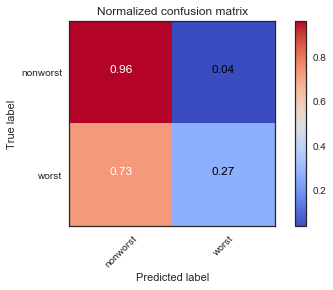

Accuracy:  0.93


In [128]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance   name_feature
10    0.208039        prep_ph
4     0.100381      num_sents
9     0.097836           poss
11    0.087272          adj_n
0     0.076976     num_tokens
17    0.070732      max_depth
3     0.070273      num_advcl
6     0.056617         num_tu
18    0.039840         num_np
15    0.035440         num_vp
5     0.033150         num_cl
12    0.029622        ger_inf
2     0.025790  num_acl_relcl
1     0.024696        num_acl
13    0.024154         part_n
16    0.011647      min_depth
14    0.007535          n_inf
7     0.000000        num_ctu
8     0.000000      num_coord


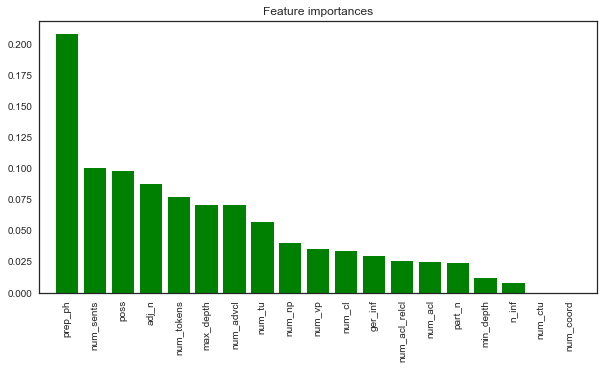

In [129]:
imp(clf1, X_worst.columns)

In [130]:
clf1.best_params_

{'max_depth': 15, 'max_features': 2}

In [131]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features'])
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=15, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

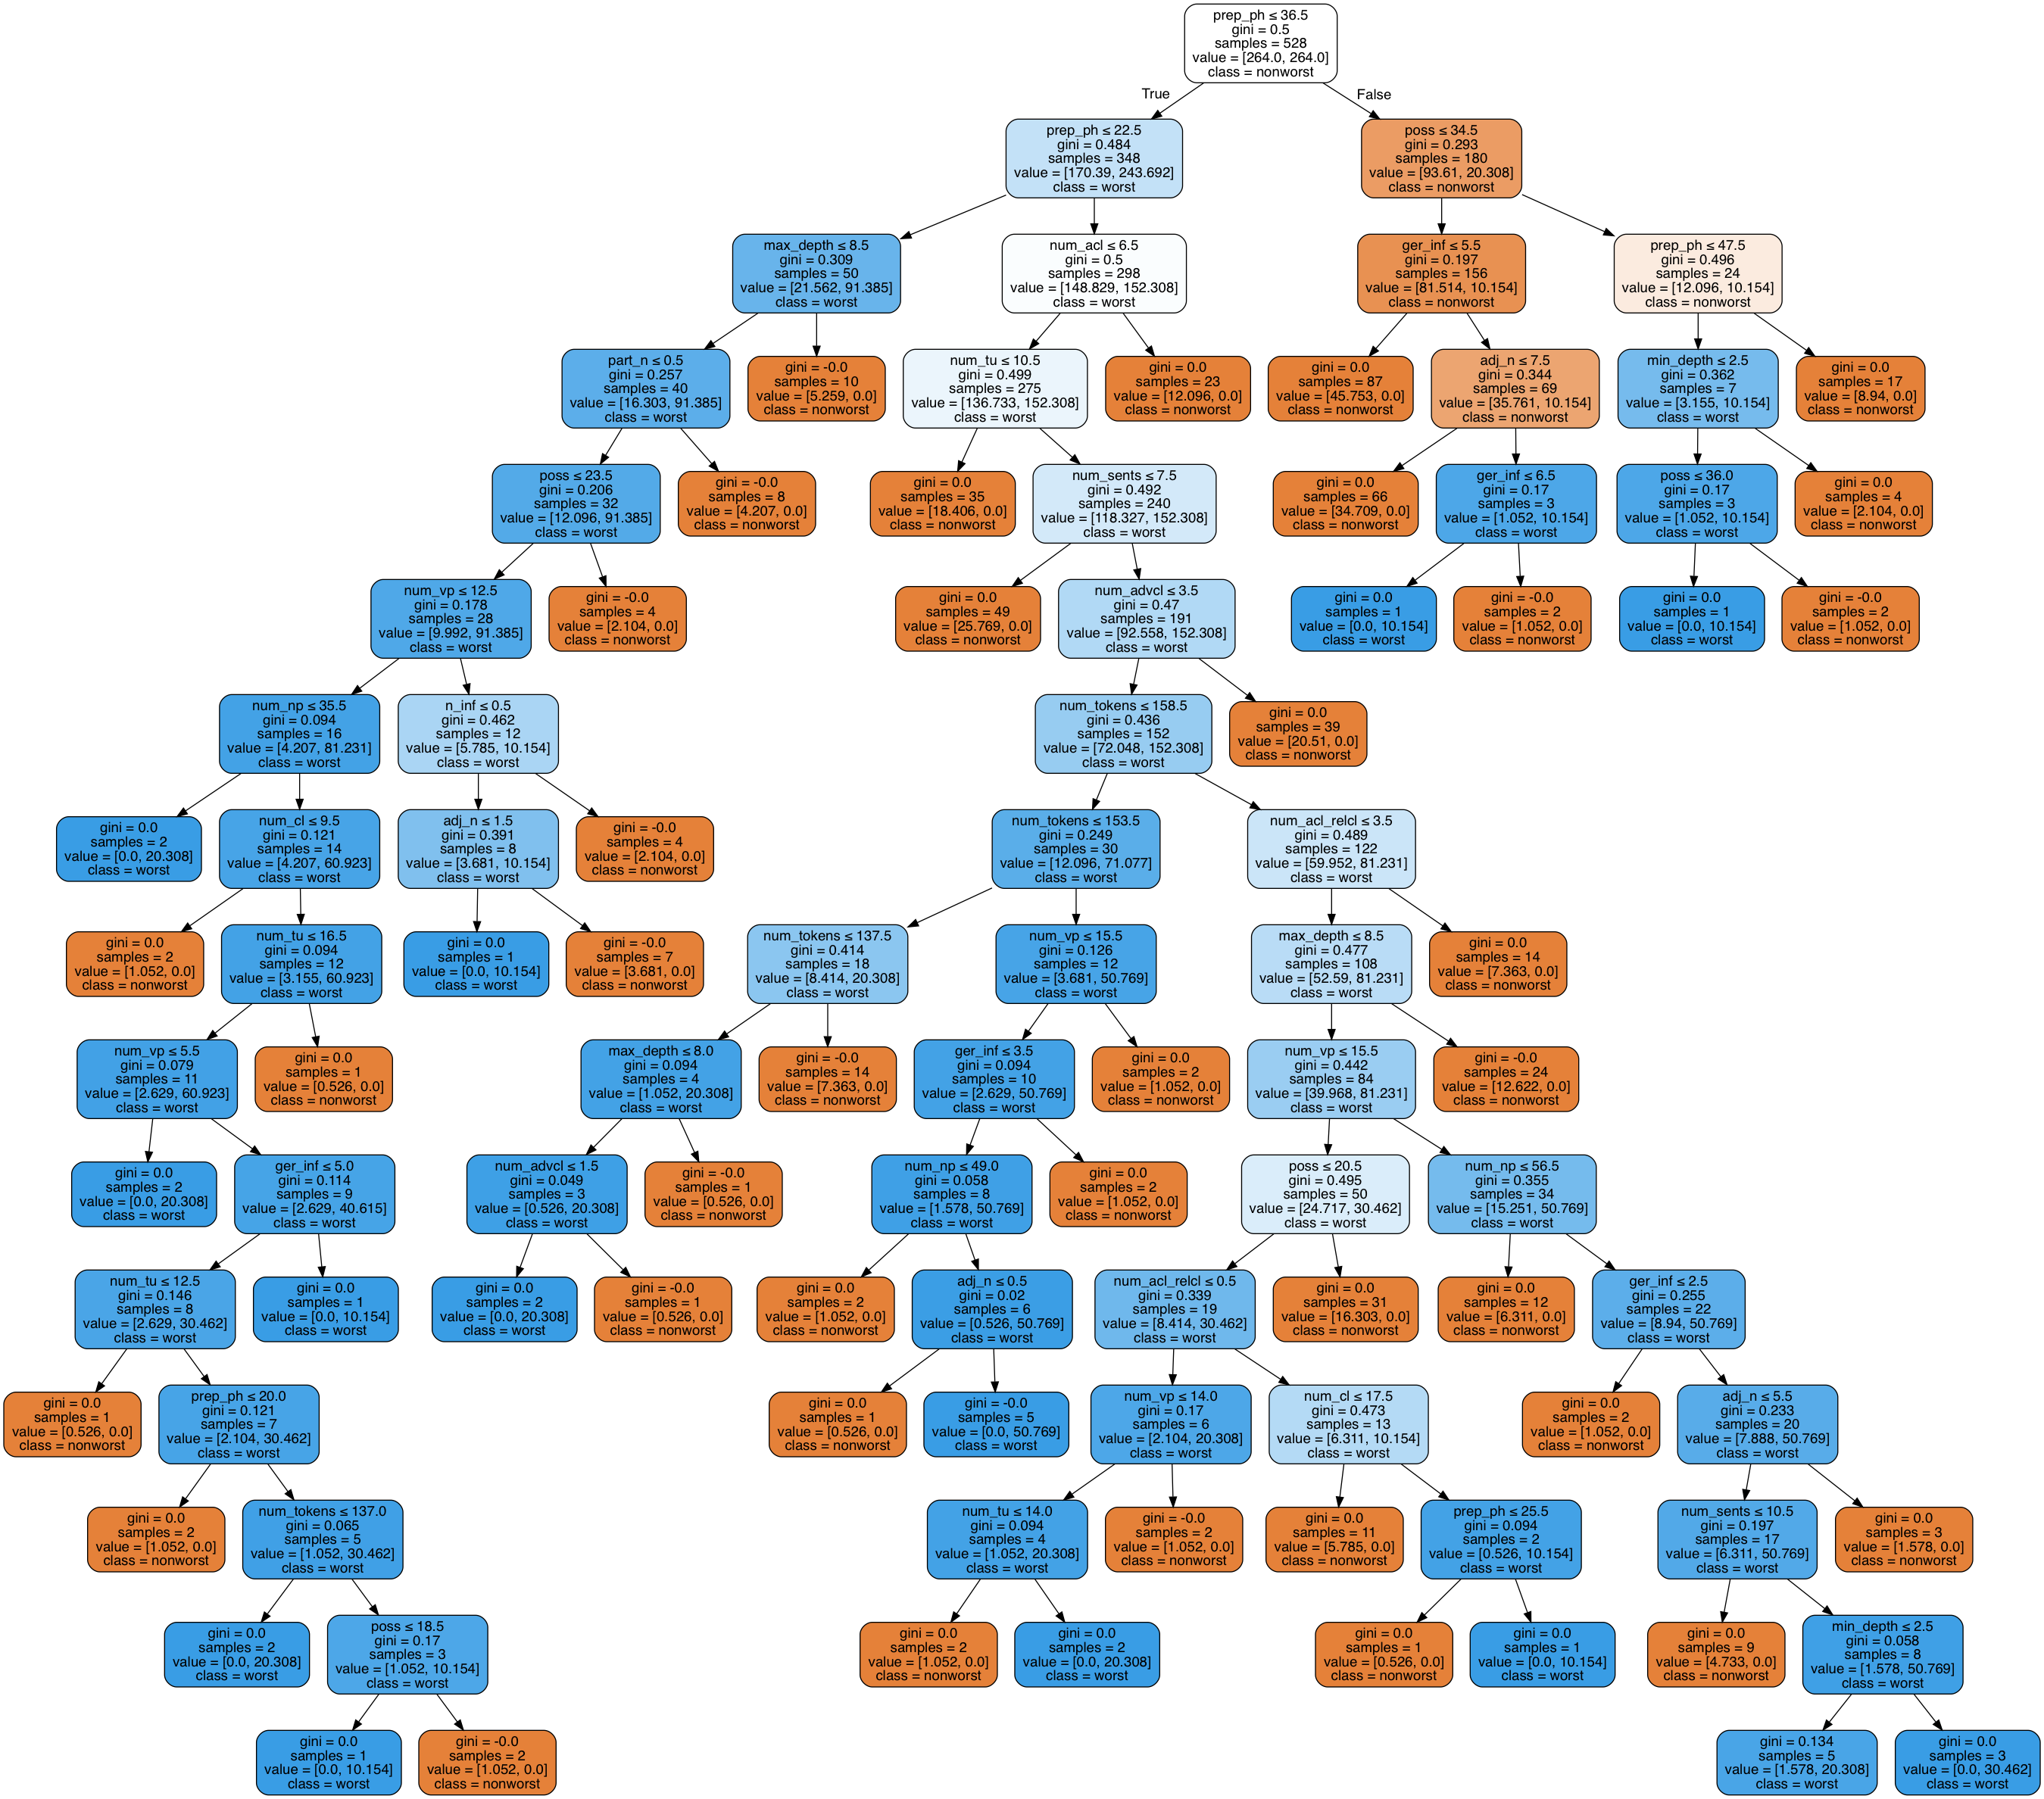

In [132]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [133]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

   nonworst       0.97      1.00      0.98       502
      worst       0.82      0.35      0.49        26

avg / total       0.96      0.96      0.96       528



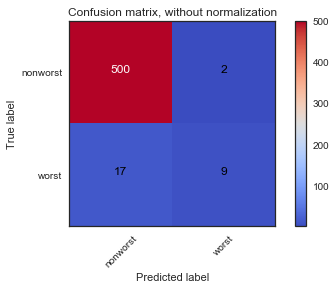

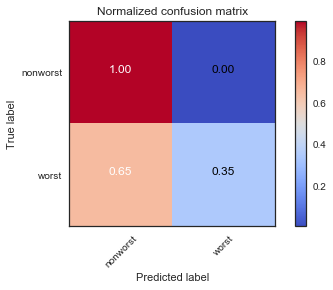

Accuracy:  0.96


In [134]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# RandomForestClassifier c выбором лучших гиперпараметров

In [135]:
y_test_1 = []
for x in y_test:
    if x == 'worst':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

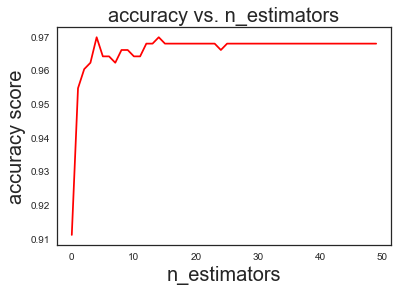

In [136]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [137]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.95      0.99      0.97       502
      worst       0.00      0.00      0.00        26

avg / total       0.90      0.94      0.92       528



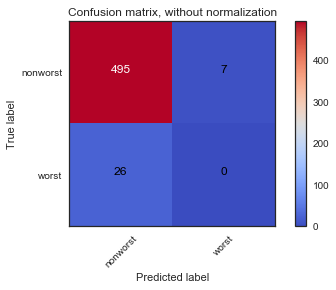

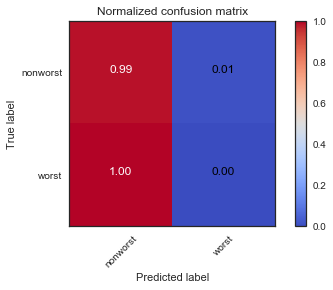

Accuracy:  0.94


In [138]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance   name_feature
0     0.219737     num_tokens
17    0.107910      max_depth
4     0.083343      num_sents
9     0.072099           poss
15    0.070898         num_vp
6     0.065917         num_tu
18    0.063582         num_np
12    0.056024        ger_inf
3     0.043804      num_advcl
5     0.036545         num_cl
10    0.035242        prep_ph
8     0.025892      num_coord
11    0.023356          adj_n
13    0.022138         part_n
14    0.020534          n_inf
2     0.019999  num_acl_relcl
16    0.015435      min_depth
1     0.013566        num_acl
7     0.003979        num_ctu


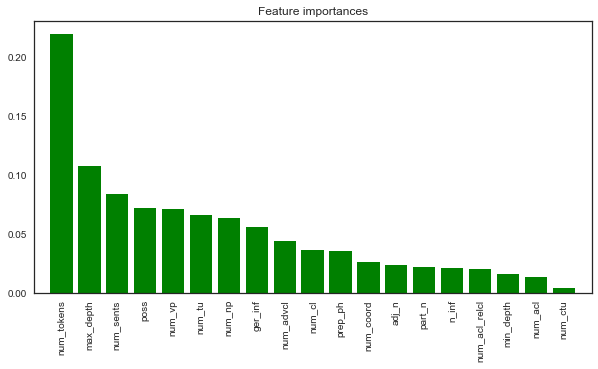

In [139]:
imp(clf2, X_worst.columns)

# LogisticRegression c важными признаками ('l1')

In [140]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

             precision    recall  f1-score   support

   nonworst       0.96      1.00      0.98       502
      worst       0.71      0.19      0.30        26

avg / total       0.95      0.96      0.94       528



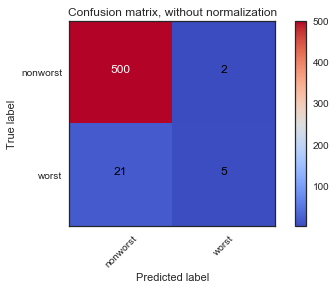

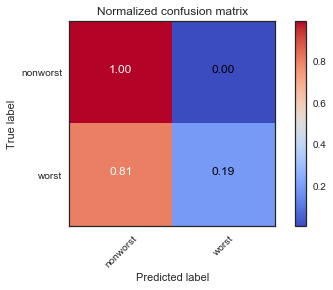

Accuracy:  0.96


In [141]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# LogisticRegression с лучшими гиперпараметрами

In [142]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

             precision    recall  f1-score   support

   nonworst       0.97      1.00      0.98       502
      worst       0.83      0.38      0.53        26

avg / total       0.96      0.97      0.96       528



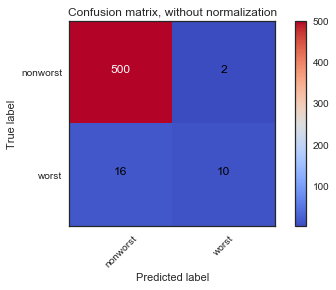

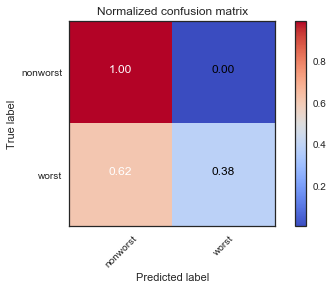

Accuracy:  0.97


In [143]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

In [144]:
clf3.best_params_

{'C': 7.742636826811269}

In [145]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Feature ranking:
    importance   name_feature
17  100.000000      max_depth
4    99.581026      num_sents
13   76.459938         part_n
14   73.187756          n_inf
12   52.027639        ger_inf
1    45.708125        num_acl
3    38.946078      num_advcl
5    38.418297         num_cl
15   33.156180         num_vp
16   31.458617      min_depth
6    30.747942         num_tu
11   28.817138          adj_n
0    22.996978     num_tokens
9    18.651374           poss
8    18.110022      num_coord
18    5.342520         num_np
10    3.326101        prep_ph
7     0.000000        num_ctu
2     0.000000  num_acl_relcl


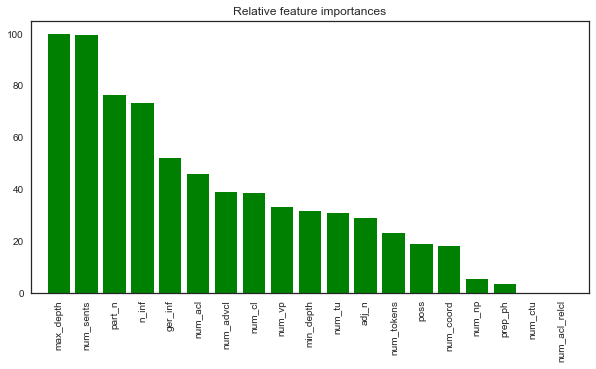

In [146]:
imp2(clf3, X_worst.columns)

# Важность признаков

In [147]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Со сложными признаками

In [148]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures1000_1.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [149]:
df[['name', 'grade1', 'grade2', 'av_depth', 'mean_l_sim', 'mean_p_sim', 'mean_l_sim_nei', 'mean_p_sim_nei',
'mean_length_s', 'mean_length_c', 'c_s', 'c_t',
'acl_t', 'acl_relcl_t', 'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl',
'coord_cl', 't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'n_inf_s',
'vp_s', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)

In [150]:
df.head()

,h,name,grade1,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,...,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root,nan
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1....,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,55,aver,5.14,31.14,24.76,33.0,26.0,26.57,...,1.857,1.857,4.857,0.857,1.714,0.286,0.0,1.714,7.14,
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1....,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,50,aver,4.7,21.42,16.82,22.78,17.44,19.5,...,1.4,1.9,3.6,0.1,0.3,0.1,0.0,1.7,6.2,
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1....,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,75,best,4.27,32.36,26.07,31.4,25.2,24.64,...,2.091,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82,
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1....,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,55,aver,4.9,24.18,18.98,25.0,20.22,21.8,...,1.4,2.7,4.6,0.3,0.2,0.0,0.0,1.2,6,
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1....,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,60,aver,4.44,23.31,17.03,22.38,16.5,21.11,...,1.444,2.0,4.333,0.444,0.222,0.111,0.222,1.667,5,


In [151]:
df = df.drop(['h','nan', 'grade1'], axis=1)

In [152]:
df.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,5.14,31.14,24.76,33.0,26.0,26.57,14.308,1.857,...,0.077,1.857,1.857,4.857,0.857,1.714,0.286,0.0,1.714,7.14
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,4.7,21.42,16.82,22.78,17.44,19.5,13.929,1.4,...,0.357,1.4,1.9,3.6,0.1,0.3,0.1,0.0,1.7,6.2
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,0.348,2.091,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,4.9,24.18,18.98,25.0,20.22,21.8,15.571,1.4,...,0.286,1.4,2.7,4.6,0.3,0.2,0.0,0.0,1.2,6
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,4.44,23.31,17.03,22.38,16.5,21.11,14.615,1.444,...,0.154,1.444,2.0,4.333,0.444,0.222,0.111,0.222,1.667,5


In [153]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade2'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [154]:
df.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,5.14,31.14,24.76,33.0,26.0,26.57,14.308,1.857,...,1.857,4.857,0.857,1.714,0.286,0.0,1.714,7.14,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,4.7,21.42,16.82,22.78,17.44,19.5,13.929,1.4,...,1.9,3.6,0.1,0.3,0.1,0.0,1.7,6.2,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82,nonworst,best
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,4.9,24.18,18.98,25.0,20.22,21.8,15.571,1.4,...,2.7,4.6,0.3,0.2,0.0,0.0,1.2,6,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,4.44,23.31,17.03,22.38,16.5,21.11,14.615,1.444,...,2.0,4.333,0.444,0.222,0.111,0.222,1.667,5,nonworst,nonbest


In [155]:
df_best_non = df.drop(['grade2', 'name', 'mark_worst_nonworst'], axis=1)
y = df_best_non.values[:, df_best_non.shape[1]-1]
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

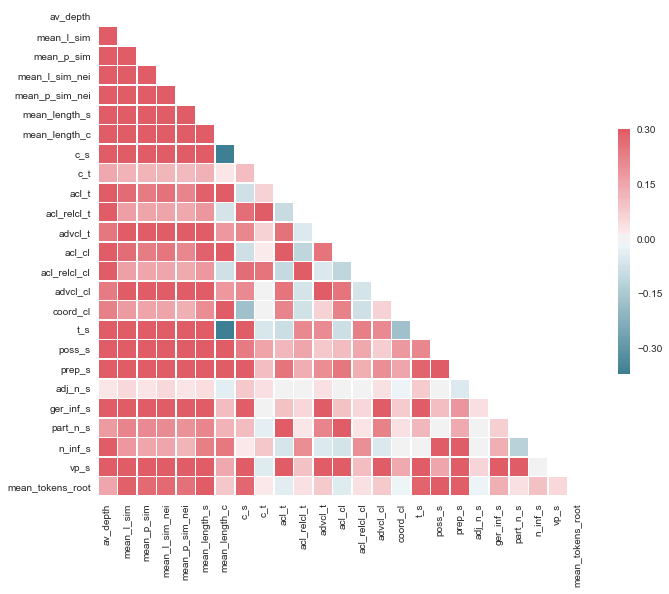

In [156]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

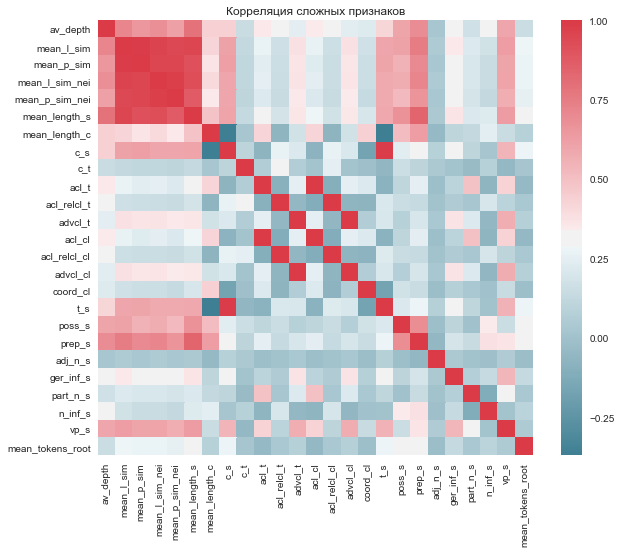

In [157]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция сложных признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_complex.png')

In [158]:
skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 950 essays ): [ 106  107  108  109  110  111  112  113  114  115  116  117  118  119
  120  121  122  123  124  125  126  127  128  129  130  131  132  133
  134  135  136  137  138  139  140  141  142  143  144  145  146  147
  148  149  150  151  152  153  154  155  156  157  158  159  160  161
  162  163  164  165  166  167  168  169  170  171  172  173  174  175
  176  177  178  179  180  181  182  183  184  185  186  187  188  189
  190  191  192  193  194  195  196  197  198  199  200  201  202  203
  204  205  206  207  208  209  210  211  212  213  214  215  216  217
  218  219  220  221  222  223  224  225  226  227  228  229  230  231
  232  233  234  235  236  237  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298

# Дерево решений

             precision    recall  f1-score   support

       best       0.12      0.14      0.13         7
    nonbest       0.94      0.93      0.93        98

avg / total       0.88      0.88      0.88       105



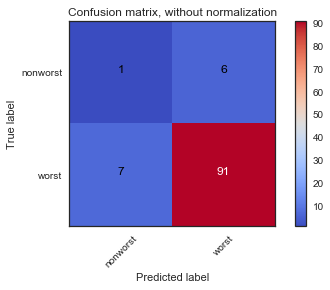

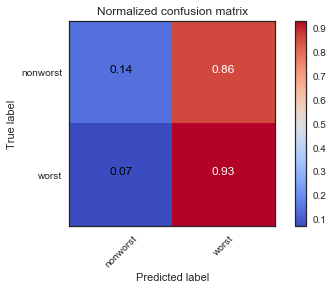

Accuracy:  0.88


In [159]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
6     0.168550     mean_length_c
12    0.112451            acl_cl
24    0.083371  mean_tokens_root
14    0.060422          advcl_cl
18    0.057614            prep_s
22    0.047886           n_inf_s
0     0.046831          av_depth
21    0.046212          part_n_s
17    0.044633            poss_s
23    0.043615              vp_s
2     0.043169        mean_p_sim
11    0.034309           advcl_t
3     0.033809    mean_l_sim_nei
1     0.032517        mean_l_sim
7     0.022179               c_s
5     0.021569     mean_length_s
19    0.015582           adj_n_s
20    0.015213         ger_inf_s
13    0.014132      acl_relcl_cl
8     0.013751               c_t
10    0.013346       acl_relcl_t
16    0.010752               t_s
15    0.009513          coord_cl
4     0.007623    mean_p_sim_nei
9     0.000950             acl_t


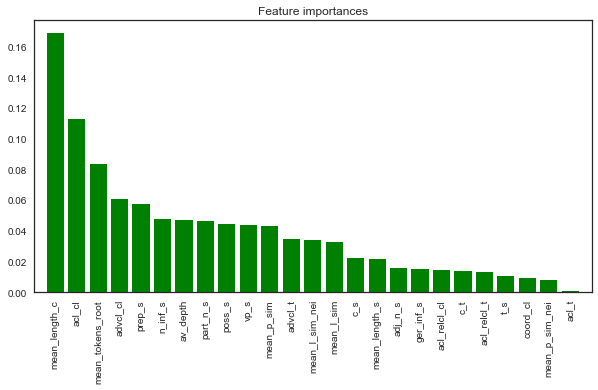

In [160]:
imp(clf1, X_df_best_non.columns)

In [161]:
clf1.best_params_

{'max_depth': 23, 'max_features': 16}

In [162]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=23, max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [163]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# RandomForestClassifier

In [164]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

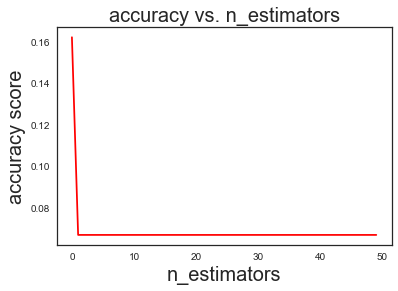

In [165]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [166]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 25), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

       best       0.00      0.00      0.00         7
    nonbest       0.93      0.99      0.96        98

avg / total       0.87      0.92      0.90       105



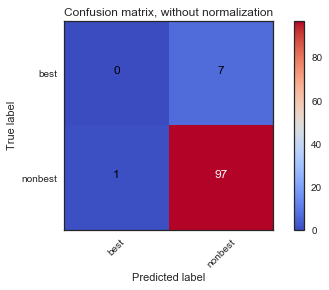

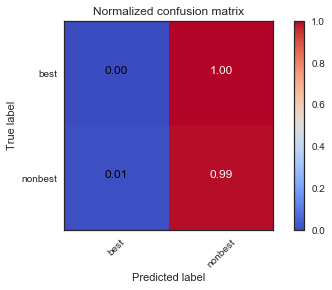

Accuracy:  0.92


In [167]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
17    0.067993            poss_s
12    0.067750            acl_cl
14    0.060151          advcl_cl
23    0.058506              vp_s
0     0.056186          av_depth
24    0.055661  mean_tokens_root
3     0.051788    mean_l_sim_nei
6     0.051582     mean_length_c
18    0.049670            prep_s
20    0.044011         ger_inf_s
10    0.039450       acl_relcl_t
1     0.038923        mean_l_sim
9     0.037963             acl_t
5     0.037873     mean_length_s
15    0.036375          coord_cl
2     0.032188        mean_p_sim
22    0.029610           n_inf_s
4     0.029470    mean_p_sim_nei
16    0.029149               t_s
19    0.028721           adj_n_s
21    0.026127          part_n_s
11    0.023407           advcl_t
7     0.018858               c_s
13    0.018000      acl_relcl_cl
8     0.010588               c_t


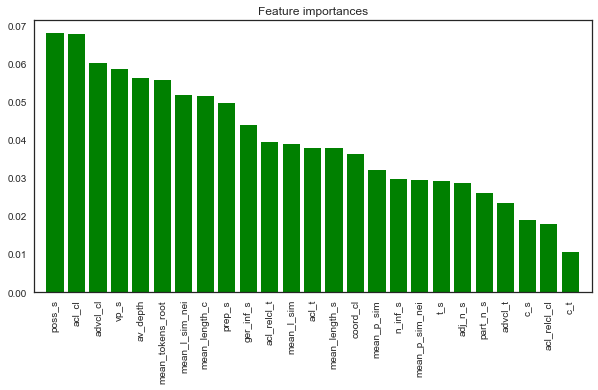

In [168]:
imp(clf2, X_df_best_non.columns)

# LogisticRegression

In [169]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

       best       0.00      0.00      0.00         7
    nonbest       0.93      1.00      0.97        98

avg / total       0.87      0.93      0.90       105



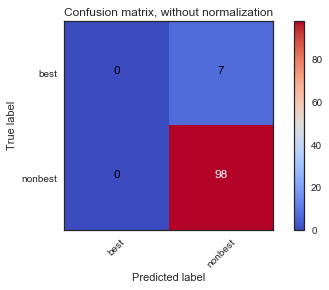

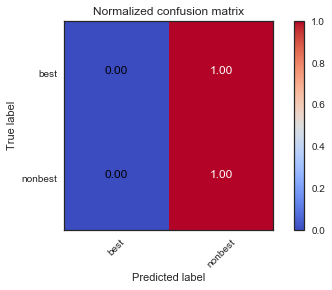

Accuracy:  0.93


In [170]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

In [171]:
clf3.best_params_

{'C': 1.0}

In [172]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Feature ranking:
    importance      name_feature
8   100.000000               c_t
14   50.493355          advcl_cl
9    41.950632             acl_t
22   21.711106           n_inf_s
7    18.293821               c_s
17   11.687559            poss_s
20    9.914426         ger_inf_s
1     8.056538        mean_l_sim
18    5.875173            prep_s
3     4.780826    mean_l_sim_nei
6     4.366880     mean_length_c
5     2.830904     mean_length_s
2     2.120528        mean_p_sim
24    1.072657  mean_tokens_root
0     0.844016          av_depth
4     0.658364    mean_p_sim_nei
15    0.000000          coord_cl
16    0.000000               t_s
13    0.000000      acl_relcl_cl
11    0.000000           advcl_t
19    0.000000           adj_n_s
10    0.000000       acl_relcl_t
21    0.000000          part_n_s
23    0.000000              vp_s
12    0.000000            acl_cl


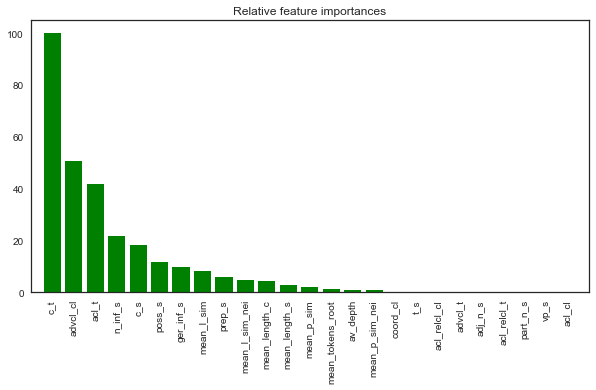

In [173]:
imp2(clf3, X_df_best_non.columns)

# Всё в куче

In [174]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures1000_1.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [175]:
df2 = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple1000_1.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [176]:
df[['name', 'grade1', 'grade2', 'av_depth', 'mean_l_sim', 'mean_p_sim', 'mean_l_sim_nei', 'mean_p_sim_nei',
'mean_length_s', 'mean_length_c', 'c_s', 'c_t',
'acl_t', 'acl_relcl_t', 'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl',
'coord_cl', 't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'n_inf_s',
'vp_s', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)

In [177]:
df2[['name', 'grade1', 'grade2', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df2['h'].str.split('\t',expand=True)

In [178]:
df = df.drop(['h','nan', 'grade1'], axis=1)

In [179]:
df.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,5.14,31.14,24.76,33.0,26.0,26.57,14.308,1.857,...,0.077,1.857,1.857,4.857,0.857,1.714,0.286,0.0,1.714,7.14
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,4.7,21.42,16.82,22.78,17.44,19.5,13.929,1.4,...,0.357,1.4,1.9,3.6,0.1,0.3,0.1,0.0,1.7,6.2
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,0.348,2.091,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,4.9,24.18,18.98,25.0,20.22,21.8,15.571,1.4,...,0.286,1.4,2.7,4.6,0.3,0.2,0.0,0.0,1.2,6
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,4.44,23.31,17.03,22.38,16.5,21.11,14.615,1.444,...,0.154,1.444,2.0,4.333,0.444,0.222,0.111,0.222,1.667,5


In [180]:
df2 = df2.drop(['h','nan', 'grade1', 'grade2', 'name'], axis=1)

In [181]:
df2.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,186,2,3,2,7,13,13,0,1,13,34,6,12,2,0,12,4,6,67
1,195,4,2,1,10,14,14,0,5,19,36,1,3,1,0,17,3,8,60
2,271,5,1,3,11,23,23,0,8,21,33,3,6,3,1,19,2,8,66
3,218,3,0,1,10,14,14,0,4,27,46,3,2,0,0,12,3,11,78
4,190,2,0,3,9,13,13,0,2,18,39,4,2,1,2,15,3,6,64


In [182]:
result = pd.concat([df, df2], axis=1)

In [183]:
result.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,5.14,31.14,24.76,33.0,26.0,26.57,14.308,1.857,...,13,34,6,12,2,0,12,4,6,67
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,4.7,21.42,16.82,22.78,17.44,19.5,13.929,1.4,...,19,36,1,3,1,0,17,3,8,60
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,21,33,3,6,3,1,19,2,8,66
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,4.9,24.18,18.98,25.0,20.22,21.8,15.571,1.4,...,27,46,3,2,0,0,12,3,11,78
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,4.44,23.31,17.03,22.38,16.5,21.11,14.615,1.444,...,18,39,4,2,1,2,15,3,6,64


In [184]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade2'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

result['mark_worst_nonworst'] = result.apply(worst_non, axis=1)
result['mark_best_nonbest'] = result.apply(best_non, axis=1)

In [185]:
df_best_non = result.drop(['grade2', 'name', 'mark_worst_nonworst'], axis=1)
y = df_best_non.values[:, df_best_non.shape[1]-1]
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

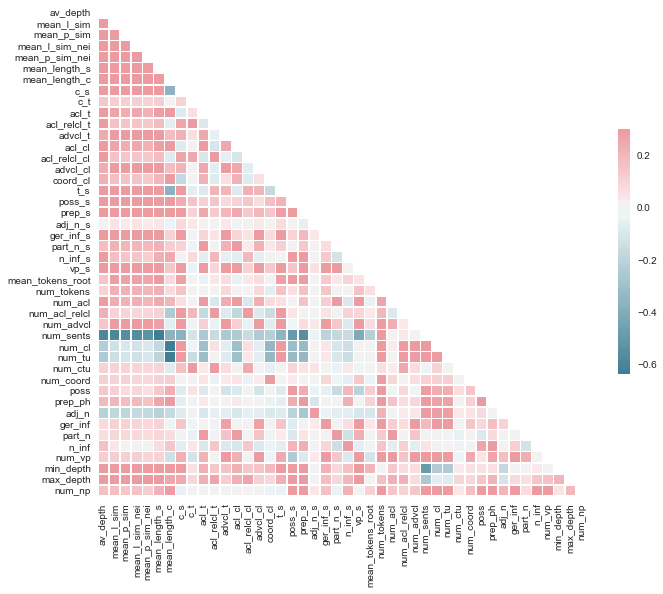

In [186]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

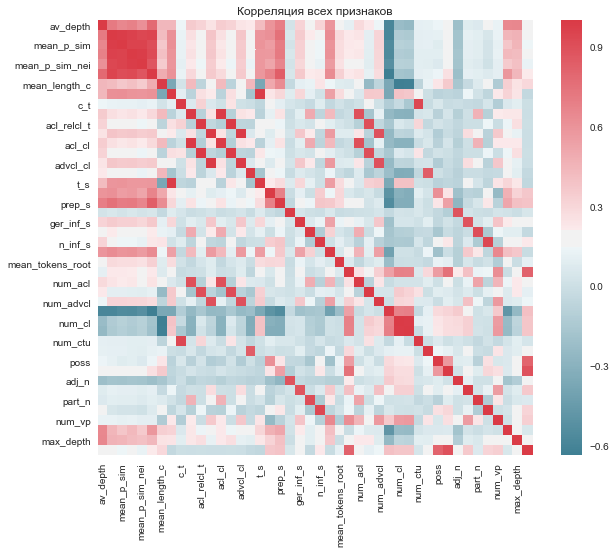

In [187]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция всех признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_all.png')

In [188]:
skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 950 essays ): [ 106  107  108  109  110  111  112  113  114  115  116  117  118  119
  120  121  122  123  124  125  126  127  128  129  130  131  132  133
  134  135  136  137  138  139  140  141  142  143  144  145  146  147
  148  149  150  151  152  153  154  155  156  157  158  159  160  161
  162  163  164  165  166  167  168  169  170  171  172  173  174  175
  176  177  178  179  180  181  182  183  184  185  186  187  188  189
  190  191  192  193  194  195  196  197  198  199  200  201  202  203
  204  205  206  207  208  209  210  211  212  213  214  215  216  217
  218  219  220  221  222  223  224  225  226  227  228  229  230  231
  232  233  234  235  236  237  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298

# Дерево решений

             precision    recall  f1-score   support

       best       0.50      0.57      0.53         7
    nonbest       0.97      0.96      0.96        98

avg / total       0.94      0.93      0.94       105



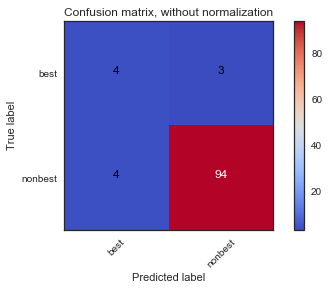

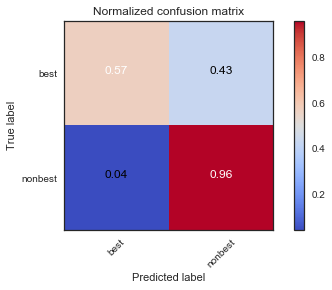

Accuracy:  0.93


In [189]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
40    0.104577            num_vp
12    0.097764            acl_cl
25    0.096912        num_tokens
0     0.074398          av_depth
9     0.068405             acl_t
10    0.055147       acl_relcl_t
20    0.052718         ger_inf_s
36    0.043056             adj_n
22    0.037198           n_inf_s
17    0.036450            poss_s
35    0.031300           prep_ph
37    0.028909           ger_inf
21    0.025689          part_n_s
34    0.024083              poss
31    0.022203            num_tu
23    0.021839              vp_s
28    0.021729         num_advcl
43    0.020225            num_np
4     0.017913    mean_p_sim_nei
24    0.016310  mean_tokens_root
6     0.015981     mean_length_c
1     0.014686        mean_l_sim
29    0.014206         num_sents
3     0.012590    mean_l_sim_nei
16    0.011243               t_s
18    0.009604            prep_s
15    0.006430          coord_cl
42    0.006057         max_depth
26    0.005767           n

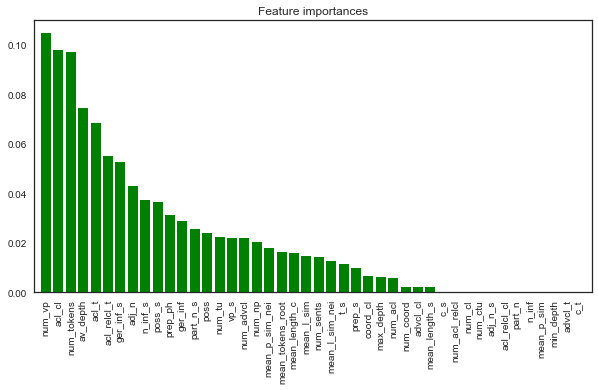

In [190]:
imp(clf1, X_df_best_non.columns)

In [191]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Лес решений

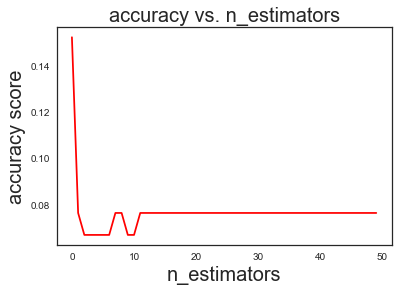

In [192]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [193]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=5, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 44), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

       best       0.00      0.00      0.00         7
    nonbest       0.93      0.98      0.96        98

avg / total       0.87      0.91      0.89       105



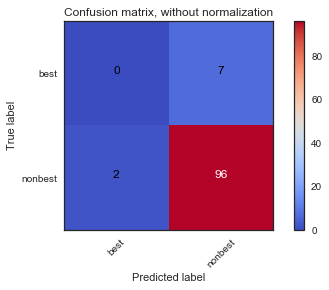

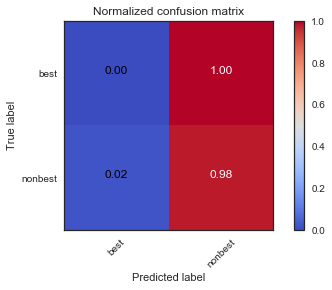

Accuracy:  0.91


In [194]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
25    0.077027        num_tokens
9     0.062346             acl_t
40    0.049286            num_vp
43    0.044423            num_np
23    0.043227              vp_s
18    0.039267            prep_s
22    0.037906           n_inf_s
28    0.037005         num_advcl
0     0.035130          av_depth
4     0.034606    mean_p_sim_nei
12    0.031785            acl_cl
14    0.031343          advcl_cl
6     0.030376     mean_length_c
10    0.029565       acl_relcl_t
20    0.028079         ger_inf_s
17    0.028079            poss_s
11    0.025975           advcl_t
5     0.024115     mean_length_s
34    0.022999              poss
15    0.022672          coord_cl
36    0.022475             adj_n
1     0.020959        mean_l_sim
24    0.019668  mean_tokens_root
7     0.018395               c_s
19    0.017867           adj_n_s
29    0.017002         num_sents
21    0.015266          part_n_s
31    0.015044            num_tu
2     0.014296        mean

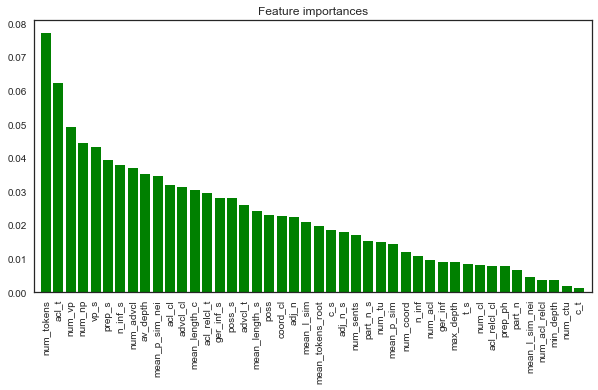

In [195]:
imp(clf2, X_df_best_non.columns)

# Logistic Regression

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

       best       0.00      0.00      0.00         7
    nonbest       0.93      1.00      0.97        98

avg / total       0.87      0.93      0.90       105



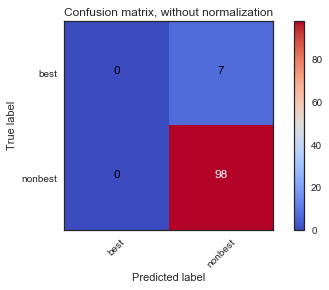

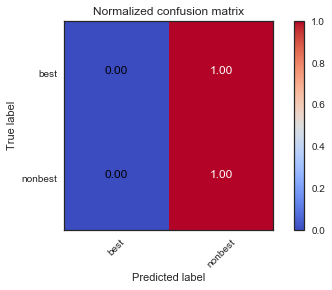

Accuracy:  0.93


In [196]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

In [197]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Feature ranking:
    importance      name_feature
20  100.000000         ger_inf_s
32   23.387227           num_ctu
29   17.768746         num_sents
28   17.106869         num_advcl
6    15.429592     mean_length_c
41   14.072359         min_depth
39   13.521490             n_inf
30   13.391943            num_cl
5    11.659967     mean_length_s
38   10.383002            part_n
1     9.858674        mean_l_sim
26    8.368898           num_acl
37    6.957554           ger_inf
3     6.496510    mean_l_sim_nei
17    5.914055            poss_s
40    5.045640            num_vp
34    3.905854              poss
25    3.419862        num_tokens
18    3.176982            prep_s
35    3.042020           prep_ph
24    2.814509  mean_tokens_root
36    2.310226             adj_n
42    1.535443         max_depth
33    0.818914         num_coord
27    0.460212     num_acl_relcl
4     0.075437    mean_p_sim_nei
31    0.000000            num_tu
0     0.000000          av_depth
22    0.000000           n

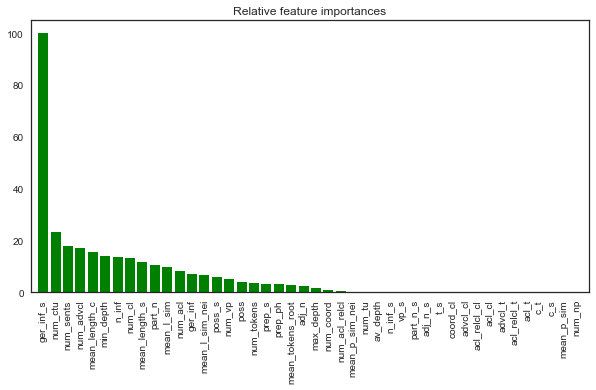

In [198]:
imp2(clf3, X_df_best_non.columns)